<a href="https://colab.research.google.com/github/naylorstone/DS3001-Final-Project/blob/alice-branch/DS3001_Project_EDA_Alice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Square Footage, Bedrooms, and Bathrooms

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# upload csv file
df = pd.read_csv("/content/train.csv")
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
df.rename(columns={'BedroomAbvGr': 'Bedrooms'}, inplace=True) # rename the bedrooms column
df['fullBath'] = df['BsmtFullBath'] + df['FullBath'] # number of full baths
df['halfBath'] = df['BsmtHalfBath'] + df['HalfBath'] # number of half baths
df['SqFt'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] # total square footage
df['Bathrooms'] = df['fullBath'] + 0.5*df['halfBath'] # number of bathrooms

Exploratory Data Tables

In [4]:
df.loc[:,['Bedrooms', 'SalePrice']].groupby('Bedrooms').describe()

SalePrice                                                    \
             count           mean            std       min       25%   
Bedrooms                                                               
0              6.0  221493.166667  106675.888935  108959.0  144250.0   
1             50.0  173162.420000  102975.067584   35311.0   87500.0   
2            358.0  158197.659218   78197.106241   34900.0  109900.0   
3            804.0  181056.870647   63793.924903   40000.0  136875.0   
4            213.0  220421.253521  109510.516383   64500.0  140000.0   
5             21.0  180819.047619   68472.480743   81000.0  135000.0   
6              7.0  143779.000000   26455.384839  119000.0  130450.0   
8              1.0  200000.000000            NaN  200000.0  200000.0   

                                        
               50%       75%       max  
Bedrooms                                
0         202500.0  279500.0  385000.0  
1         145250.0  208975.0  501837.0  
2         137250.0  185000.0  611657.0  
3         169945.0  214000.0  451950.0  
4         193500.0  266500.0  755000.0  
5         161500.0  240000.0  320000.0  
6         141000.0  142776.5  200000.0  
8         200000.0  200000.0  200000.0

In [5]:
df.loc[:,['Bathrooms', 'SalePrice']].groupby('Bathrooms').describe()

SalePrice                                                    \
              count           mean            std       min       25%   
Bathrooms                                                               
1.0           228.0  110869.671053   28375.647150   34900.0   93000.0   
1.5           129.0  142692.372093   35599.840436   61000.0  124000.0   
2.0           456.0  158116.103070   49311.688852   55000.0  129000.0   
2.5           295.0  199723.983051   58593.723848   91500.0  164245.0   
3.0           186.0  230525.672043   74270.645621   87000.0  180000.0   
3.5           144.0  273512.902778   90856.277845  151000.0  207625.0   
4.0            13.0  319118.769231  159996.896688  150000.0  206300.0   
4.5             7.0  386107.142857  242822.116697  160000.0  192375.0   
5.0             1.0  145900.000000            NaN  145900.0  145900.0   
6.0             1.0  179000.000000            NaN  179000.0  179000.0   

                                         
                50%       75%       max  
Bathrooms                                
1.0        112250.0  127500.0  230000.0  
1.5        142500.0  158000.0  274000.0  
2.0        145000.0  178485.0  395000.0  
2.5        184000.0  226350.0  475000.0  
3.0        213750.0  276875.0  555000.0  
3.5        247000.0  325075.0  611657.0  
4.0        299800.0  375000.0  755000.0  
4.5        250000.0  581500.0  745000.0  
5.0        145900.0  145900.0  145900.0  
6.0        179000.0  179000.0  179000.0

In [6]:
df1 = df[['Bedrooms', 'Bathrooms', 'SalePrice', 'SqFt']]
df1.corr()


,Bedrooms,Bathrooms,SalePrice,SqFt
Bedrooms,1.000000,0.234885,0.168213,0.354034
Bathrooms,0.234885,1.000000,0.631731,0.604324
SalePrice,0.168213,0.631731,1.000000,0.782260
SqFt,0.354034,0.604324,0.782260,1.000000


Exploratory Plots

<Axes: xlabel='Bathrooms', ylabel='Count'>

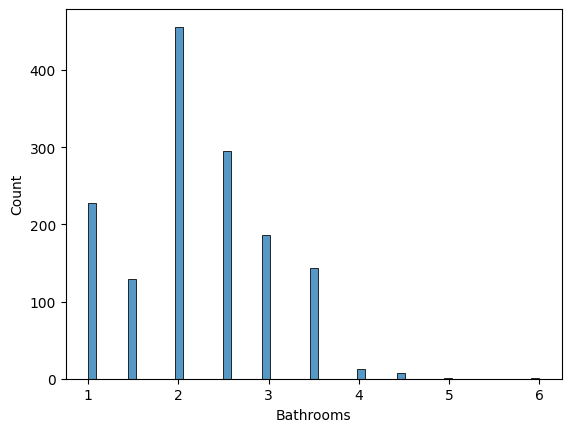

In [7]:
sns.histplot(df['Bathrooms']) # most common value is 2 bathrooms

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Bathrooms'>

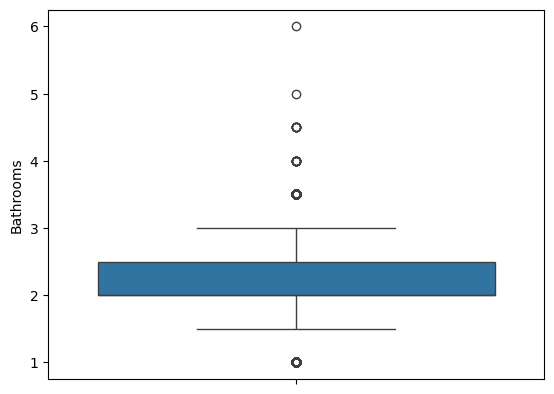

In [8]:
sns.boxplot(df['Bathrooms'])

<Axes: xlabel='Bedrooms', ylabel='Count'>

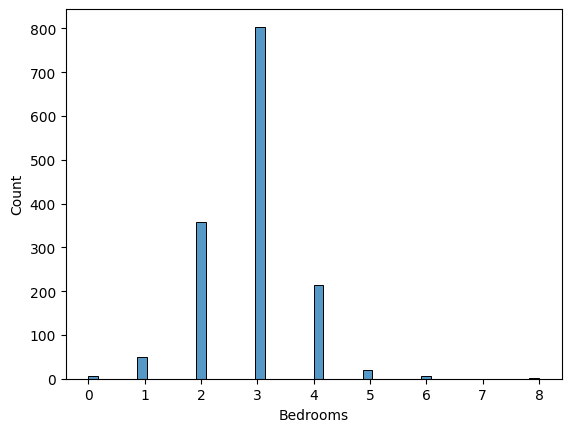

In [9]:
sns.histplot(df['Bedrooms']) # most common number of bedrooms is 3

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Bedrooms'>

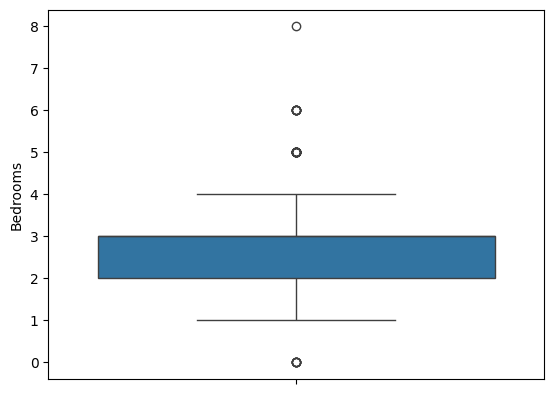

In [10]:
sns.boxplot(df['Bedrooms']) # outliers at 0, 5, 6, and 8

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='SqFt'>

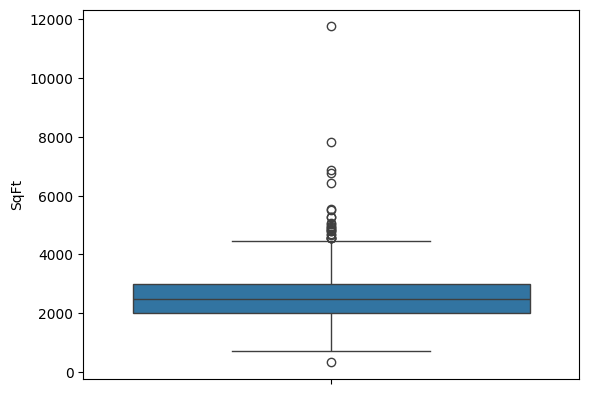

In [11]:
sns.boxplot(df['SqFt']) # greatest outliers  at 12000 and a little over 0

<Axes: xlabel='SqFt', ylabel='SalePrice'>

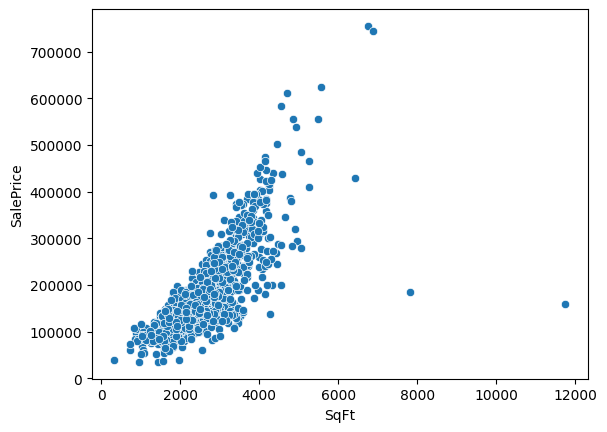

In [12]:
sns.scatterplot(data=df,x='SqFt',y='SalePrice') # there is an obvious positive correlation between the two variables

<Axes: xlabel='SqFt', ylabel='SalePrice'>

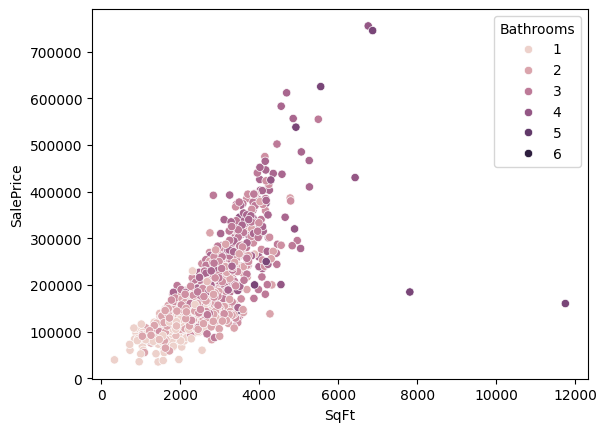

In [13]:
sns.scatterplot(data=df,x='SqFt',y='SalePrice', hue = 'Bathrooms') # there is an obvious positive correlation between the three variables

<Axes: xlabel='SqFt', ylabel='SalePrice'>

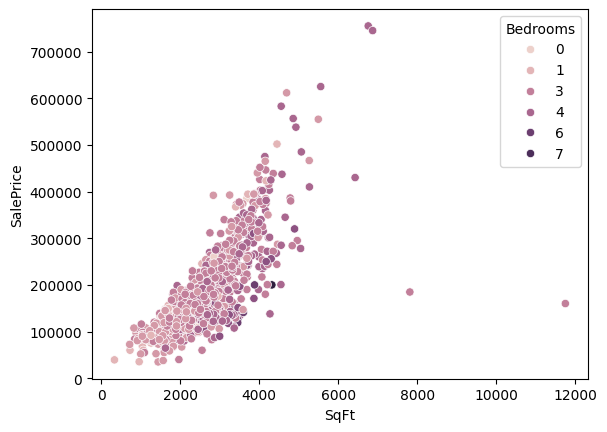

In [14]:
sns.scatterplot(data=df,x='SqFt',y='SalePrice', hue = 'Bedrooms') # there is an obvious positive correlation between the three variables